# Take 2: Adaboost with Weak Classifiers
None of that bagging classifier bullshit

jonat version

In [1]:
# Import guys
import pandas as pd
import numpy as np
from scipy import sparse
# from AdaBoostClassifier import AdaBoostClassifier
#%run AdaBoostWeak.py
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


### Import data

In [2]:
# column names
with open('data/column_names.txt', 'r') as f:
    column_names = [line.strip() for line in f]

sparse_dat = sparse.load_npz("data/sparse_df.npz")

# Extract labels from the first column
labels = sparse_dat[:, 0]

# Create a list of column indices to keep
to_keep = list(set(range(sparse_dat.shape[1])) - set([0]))

# Extract the design matrix
X = sparse_dat[:, to_keep]

print(f'labels: \n{labels}')

labels: 
  (2, 0)	1
  (5, 0)	1
  (8, 0)	1
  (9, 0)	1
  (11, 0)	1
  (12, 0)	1
  (15, 0)	1
  (19, 0)	1
  (34, 0)	1
  (42, 0)	1
  (54, 0)	1
  (56, 0)	1
  (65, 0)	1
  (67, 0)	1
  (68, 0)	1
  (93, 0)	1
  (95, 0)	1
  (114, 0)	1
  (117, 0)	1
  (120, 0)	1
  (121, 0)	1
  (123, 0)	1
  (134, 0)	1
  (135, 0)	1
  (139, 0)	1
  :	:
  (15952, 0)	1
  (15953, 0)	1
  (15954, 0)	1
  (15955, 0)	1
  (15956, 0)	1
  (15957, 0)	1
  (15958, 0)	1
  (15959, 0)	1
  (15960, 0)	1
  (15961, 0)	1
  (15962, 0)	1
  (15963, 0)	1
  (15964, 0)	1
  (15965, 0)	1
  (15966, 0)	1
  (15967, 0)	1
  (15968, 0)	1
  (15969, 0)	1
  (15970, 0)	1
  (15971, 0)	1
  (15972, 0)	1
  (15973, 0)	1
  (15974, 0)	1
  (15975, 0)	1
  (15976, 0)	1


In [3]:
print(f'Design matrix: \n{X}')

Design matrix: 
  (17173, 0)	1
  (17240, 0)	2
  (17164, 1)	1
  (17363, 1)	1
  (17448, 1)	1
  (17910, 1)	1
  (17914, 1)	1
  (17933, 1)	2
  (15801, 2)	1
  (15867, 2)	1
  (16217, 2)	1
  (17173, 2)	3
  (17189, 2)	1
  (17386, 2)	1
  (17765, 2)	4
  (17933, 3)	2
  (17325, 4)	1
  (17366, 4)	1
  (16271, 5)	1
  (16837, 5)	1
  (17933, 6)	2
  (17933, 7)	2
  (17173, 8)	2
  (17933, 8)	1
  (15801, 9)	1
  :	:
  (8386, 56199)	2
  (8669, 56200)	1
  (10316, 56200)	1
  (8805, 56201)	1
  (9218, 56201)	1
  (9565, 56202)	1
  (9814, 56202)	1
  (6232, 56203)	1
  (9353, 56203)	1
  (5661, 56204)	9
  (6860, 56204)	1
  (8698, 56204)	1
  (125, 56205)	1
  (1228, 56205)	1
  (4422, 56205)	1
  (5648, 56206)	1
  (7464, 56206)	1
  (5648, 56207)	2
  (6025, 56208)	2
  (6025, 56209)	2
  (6151, 56210)	2
  (8669, 56211)	1
  (10316, 56211)	1
  (6340, 56212)	1
  (8696, 56212)	1


### Train and Test split
To do: consider stratifying by type

In [6]:
# To do - stratify the split 
n_samples = labels.shape[0]
# Use train_test_split.
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2, shuffle=True, stratify=labels.toarray().ravel())

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_train.dtype)
print("proportion of spam in training data:", (y_train == 1).sum().item() / y_train.shape[0])
print("proportion of spam in testing data:", (y_test == 1).sum().item() / y_test.shape[0])

(14524, 56213)
(14524, 1)
(3632, 56213)
(3632, 1)
int64
proportion of spam in training data: 0.3404020930873038
proportion of spam in testing data: 0.34030837004405284


In [32]:
def errors(y, y_pred):
        """
        Calculate the proportion of type 2 errors - when the true label is 1 - spam, and the predicted label is 0 - ham

        Args:
        y: true labels
        y_pred: predicted labels
        """
        n = y.shape[0]
        y[y == -1] = 0
        type2errors = ((y == 1) & (y_pred == 0)).sum().item()
        type1errors = ((y == 0) & (y_pred == 1)).sum().item()
        correct = (y_pred == y).sum().item()
        #print(np.unique(y_pred), np.unique(y))
        return type2errors, type1errors, correct

### Train/Test models

2 models:
1. Without penalty
2. With penalty

In [8]:
%run AdaBoostWeakClassic.py

aboost1 = AdaBoostWeakClassic(type2penalty = False, rounds = 200, maxDTdepth = 5)
aboost1.fit(X = X_train, y = y_train.toarray().ravel())



In [10]:
predictions = aboost1.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 1 (no penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 1 (no penalty) Training set Accuracy:  0.9902230790415864
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 142 
 type 1 errors: 0


In [9]:
predictions = aboost1.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 1 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 1 Test Accuracy:  0.9427312775330396
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 163 
 type 1 errors: 45
[0 0 1 ... 0 0 0]


In [11]:
%run AdaBoostWeakClassic.py

aboost2 = AdaBoostWeakClassic(type2penalty = True, rounds = 200, maxDTdepth = 5, pen_factor = 1.5)
aboost2.fit(X = X_train, y = y_train.toarray().ravel())

In [12]:
predictions = aboost2.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Model 2 (with penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')

Model 2 (with penalty) Training set Accuracy:  0.9816166345359405
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 267 
 type 1 errors: 0


In [13]:
predictions = aboost2.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Model 2 Test Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
# print(aboost1.alphas)
print(predictions)

Model 2 Test Accuracy:  0.9350220264317181
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 193 
 type 1 errors: 43
[0 0 1 ... 0 0 0]


### Model tuning/Hyperparameter search

Sigh. So much overfitting

In [33]:
param_grid = \
{'type2penalty': [False, True] ,'rounds': [200, 350 ,500], 'maxDTdepth': [5,10], 'pen_factor': [0.1, 0.3, 0.5, 0.7, 1.2, 1.5, 1.7, 2]}

In [34]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.125, shuffle=True, stratify= y_train.toarray().ravel())

print(f'X_train2 shape {X_train2.shape} \ny_train2 shape {y_train2.shape} \nX_val shape {X_val.shape} \ny_val shape {y_val.shape} ')

X_train2 shape (12708, 56213) 
y_train2 shape (12708, 1) 
X_val shape (1816, 56213) 
y_val shape (1816, 1) 


In [35]:
%run AdaBoostWeakClassic.py
for rounds in param_grid['rounds']:
    for maxDTdepth in param_grid['maxDTdepth']:
        dense_y_train2 = y_train2.toarray().ravel()
        aboost = AdaBoostWeakClassic(type2penalty = False, rounds = rounds, maxDTdepth = maxDTdepth)
        aboost.fit(X = X_train2, y = dense_y_train2)

        # training reports
        predictions = aboost.predict(X_train2)
        type2, type1, correct = errors(dense_y_train2, predictions)
        #print(f'prediction shape {predictions.shape}, true labels shape {dense_y_train2.shape}')
        print(f"Model without penalty | rounds: {rounds} | maxDTdepth: {maxDTdepth}")
        print("Training Accuracy: ", correct/len(predictions))
        print("Training correct count: ", correct, "len of predictions", len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')

        # validation reports
        dense_y_val = y_val.toarray().ravel()
        predictions = aboost.predict(X_val)
        type2, type1, correct = errors(dense_y_val, predictions)
        print("Validation Accuracy: ", correct/len(predictions))
        print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')
        
        for pen_factor in param_grid['pen_factor']:
            aboost = AdaBoostWeakClassic(type2penalty = True, rounds = rounds, maxDTdepth = maxDTdepth, pen_factor=pen_factor)
            aboost.fit(X = X_train2, y = dense_y_train2)

            # training reports
            predictions = aboost.predict(X_train2)
            type2, type1, correct = errors(dense_y_train2, predictions)
            print(f"Model with penalty: {pen_factor} | rounds: {rounds} | maxDTdepth: {maxDTdepth}")
            print("Training Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}')

            # testing reports
            predictions = aboost.predict(X_val)
            type2, type1, correct = errors(dense_y_val, predictions)
            print("Validation Accuracy: ", correct/len(predictions))
            print(f'type 2 errors: {type2} \ntype 1 errors: {type1}\n')


Model without penalty | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9968523764557758
Training correct count:  12668 len of predictions 12708
type 2 errors: 40 
type 1 errors: 0
Validation Accuracy:  0.9377753303964758
type 2 errors: 83 
type 1 errors: 30

Model with penalty: 0.1 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9859930752282027
type 2 errors: 177 
type 1 errors: 1
Validation Accuracy:  0.9383259911894273
type 2 errors: 89 
type 1 errors: 23

Model with penalty: 0.3 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.987330815234498
type 2 errors: 161 
type 1 errors: 0
Validation Accuracy:  0.9377753303964758
type 2 errors: 86 
type 1 errors: 27

Model with penalty: 0.5 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9999213094113943
type 2 errors: 0 
type 1 errors: 1
Validation Accuracy:  0.9460352422907489
type 2 errors: 33 
type 1 errors: 65

Model with penalty: 0.7 | rounds: 200 | maxDTdepth: 5
Training Accuracy:  0.9830028328611898
type 2 errors: 216 
t

KeyboardInterrupt: 

### Performance Metrics

F1 score, confusion matrix, etc.

For now, we will stick to penalty 1.2, 200 rounds, tree depth of 5

In [62]:
%run AdaBoostWeakClassic.py

from sklearn import metrics
aboost_final = AdaBoostWeakClassic(rounds = 200, type2penalty=True, pen_factor = 1.2)
aboost_final.fit(X_train, y_train.toarray().ravel())

In [63]:
predictions = aboost_final.predict(X_train)
type2, type1, correct = errors(y_train.toarray().ravel(), predictions)
print("Final Model (without penalty) Training set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
y_train_flat = y_train.copy().toarray().ravel()
y_train_flat[y_train_flat == -1] = 0
print(f'F1 score: {metrics.f1_score(y_true = y_train_flat, y_pred= predictions)}')

Final Model (without penalty) Training set Accuracy:  0.9267419443679427
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 442 
 type 1 errors: 622
F1 score: 0.8943186332936035


In [64]:
predictions = aboost_final.predict(X_test)
type2, type1, correct = errors(y_test.toarray().ravel(), predictions)
print("Final Model (with penalty) Test set Accuracy: ", correct/len(predictions))
print(f'unique predictions - should be 0 and 1: {np.unique(predictions)}')
print(f'type 2 errors: {type2} \n type 1 errors: {type1}')
y_test_flat = y_test.copy().toarray().ravel()
y_test_flat[y_test_flat == -1] = 0


print(f'F1 score: {metrics.f1_score(y_true = y_test.toarray().ravel(), y_pred= predictions)}')

Final Model (with penalty) Test set Accuracy:  0.9149229074889867
unique predictions - should be 0 and 1: [0 1]
type 2 errors: 139 
 type 1 errors: 170
F1 score: 0.8765481422293248


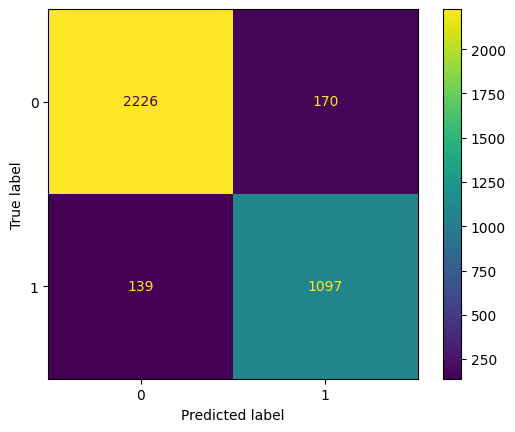

In [65]:
confusion_matrix = metrics.confusion_matrix(y_test_flat, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

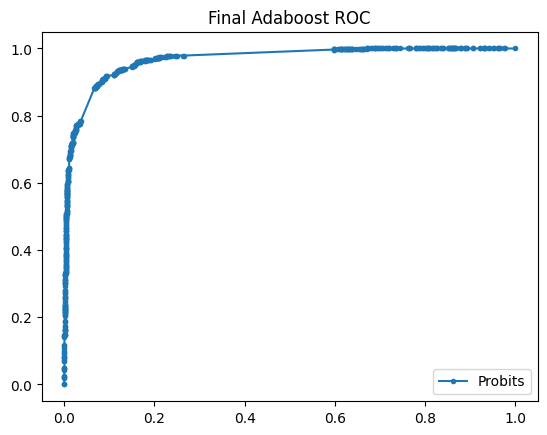

In [71]:
%run AdaBoostWeakClassic.py

probits = aboost_final.predict_probs(X_test)
ada_fpr, ada_tpr, thresholds  = metrics.roc_curve(y_test_flat, probits)
plt.plot(ada_fpr, ada_tpr, marker='.', label='Probits')
plt.title("Final Adaboost ROC")
plt.legend()

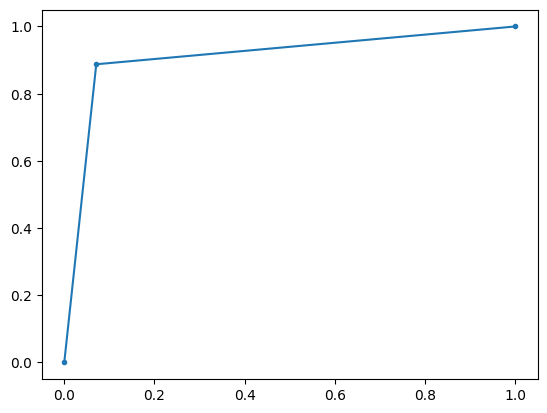

In [55]:
%run AdaBoostWeakClassic.py

ada_fpr, ada_tpr, thresholds  = metrics.roc_curve(y_test_flat, predictions)
plt.plot(ada_fpr, ada_tpr, marker='.', label='bruh')

### Comparisons to other guys
SVM, Random Forest

In [80]:
from sklearn import svm
svm_example = svm.SVC(probability = True)
svm_example.fit(X_train, y_train_flat)

SVC(probability=True)

In [ ]:
scores = svm_example.predict_proba(X_test)
svm_fpr, svm_tpr, thresholds  = metrics.roc_curve(y_test_flat, scores[:,1])

In [84]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train_flat)
scores = rf.predict_proba(X_test)

rf_fpr, rf_tpr, thresholds = metrics.roc_curve(y_test_flat, scores[:,1])

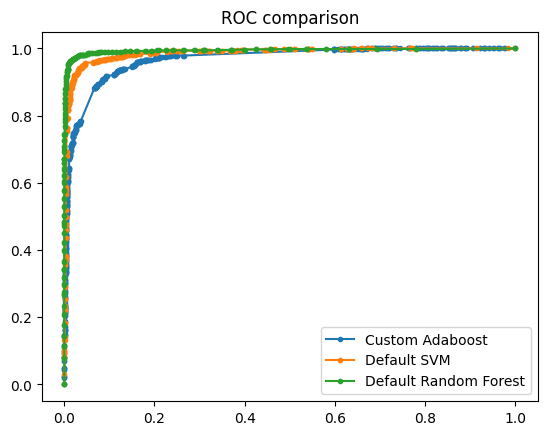

In [85]:
plt.plot(ada_fpr, ada_tpr, marker='.', label='Custom Adaboost')
plt.plot(svm_fpr, svm_tpr, marker='.', label='Default SVM')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Default Random Forest')

plt.title("ROC comparison")
plt.legend()